# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [504]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [505]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [506]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [507]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [508]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [509]:
print(df_data.shape)
print(df_data.columns)
print()
print(f"NaN Values Sum: \n\n{df_data.isna().sum()}")
print()
print(f"Duplicates Sum: \n\n{df_data.duplicated().sum()}")

(4324, 9)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

NaN Values Sum: 

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Duplicates Sum: 

0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [510]:
df_data.head(3)
# Price has NaN Values; Unnamed has no Entity; 

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


In [511]:
df_data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)
df_data.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


In [512]:
# Price is in millions

In [513]:
index_of_na_rows = df_data[df_data["Price"].isna()].index

df_data[df_data["Price"].isna()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## More data with NaN price then with price!

#### We drop the rows with NaN price ; Alternative would be to groupby Detail of rockets, then fill the rows based on the Groupation

In [514]:
df_data.drop(index=index_of_na_rows, axis=0)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [515]:
import pandas as pd

# Convert 'Price' column to numeric, coerce errors to NaN
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

In [516]:
# df_data.groupby('Organisation').agg({"Price":"mean"})
df_data['Price'] = df_data.groupby('Organisation')['Price'].transform(lambda x: x.fillna(x.mean()))

In [517]:
df_data[df_data["Price"].isna()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
35,IRGC,"Launch Plateform, Shahrud Missile Test Site","Wed Apr 22, 2020 03:59 UTC",Qased | Noor 1,StatusActive,NaN,Success
52,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Sun Feb 09, 2020 15:48 UTC",Simorgh | Zafar 1,StatusActive,NaN,Failure
71,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA","Wed Dec 11, 2019 17:55 UTC",New Shepard | NS-12,StatusActive,NaN,Success
91,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Oct 26, 2019 17:40 UTC",SARGE | Launch 4,StatusActive,NaN,Failure
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [518]:
df_data_orig = df_data.copy()

In [519]:
df_data.drop(index=df_data[df_data["Price"].isna()].index, inplace=True)

## Descriptive Statistics

In [520]:
df_data.describe()

,Price
count,"2,089.00"
mean,122.08
std,121.55
min,5.30
25%,45.00
50%,64.68
75%,170.26
max,450.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [521]:
number_of_launches = df_data.groupby("Organisation").size().reset_index(name='counts')
number_of_launches.head(2)

,Organisation,counts
0,Arianespace,279
1,Boeing,136


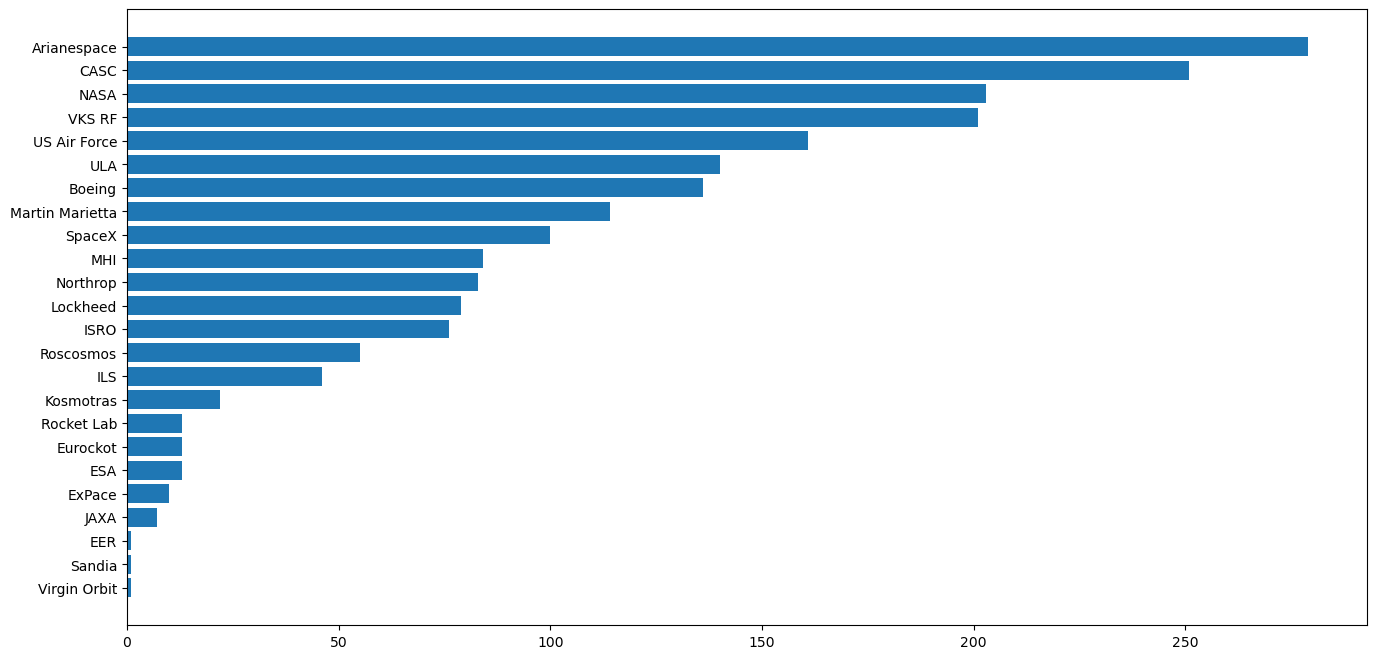

In [522]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plotting horizontal bar chart
plt.barh(data=number_of_launches.sort_values('counts'),
         y="Organisation",  # Use y instead of x
         width="counts")    # Use width instead of height

plt.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [523]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [524]:
active_rockets = df_data.groupby("Rocket_Status").size().reset_index(name='counts')
active_rockets

,Rocket_Status,counts
0,StatusActive,700
1,StatusRetired,1389


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [525]:
successful_missions = df_data.groupby("Mission_Status").size().reset_index(name='counts')
successful_missions

,Mission_Status,counts
0,Failure,124
1,Partial Failure,42
2,Prelaunch Failure,1
3,Success,1922


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

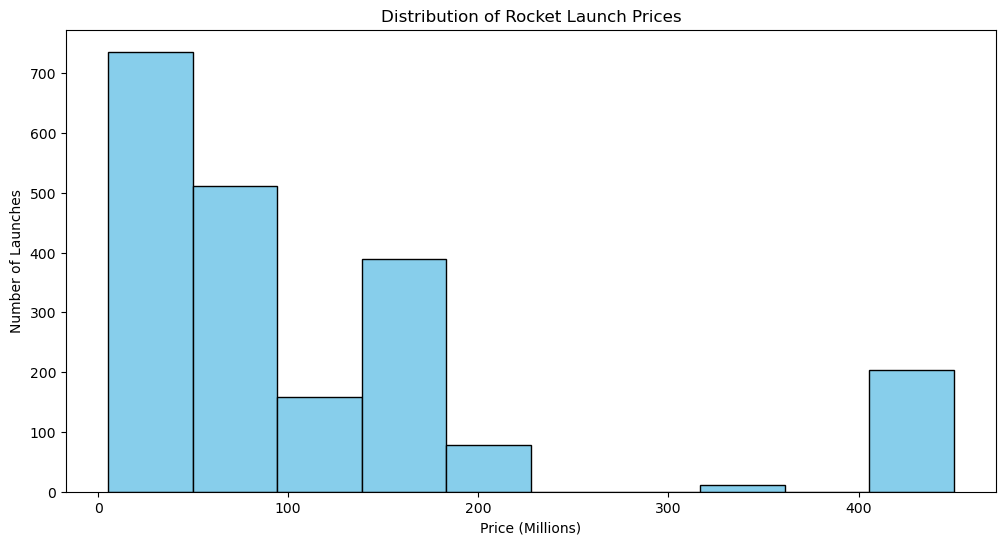

In [526]:

fig, ax = plt.subplots(figsize=(12, 6))

plt.hist(data=df_data, x="Price", bins=10, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel("Price (Millions)")
plt.ylabel("Number of Launches")
plt.title("Distribution of Rocket Launch Prices")

plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [527]:
df_data.shape

(2089, 7)

In [528]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [529]:
remap_location = df_data_orig.copy()
remap_location = remap_location["Location"]

remap_data_cleaned = []

for location in remap_location:
    if "Russia" in location or "Barents Sea" in location:
        remap_data_cleaned.append("RUS")
    elif "New Mexico" in location or "Gran Canaria" in location or "Pacific Missile Range Facility" in location or "USA" in location:
        remap_data_cleaned.append("USA")
    elif "Yellow Sea" in location or "China" in location:
        remap_data_cleaned.append("CHN")
    elif "Shahrud Missile Test Site" in location:
        remap_data_cleaned.append("IRN")
    else:
        country_split = location.split(",")[-1].strip()
        remap_data_cleaned.append(country_split)

print(remap_data_cleaned[:10])

import pycountry


countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, country) for country in remap_data_cleaned]

# df_data["Country_ISO"] = codes
df_data_orig["Country_ISO"] = codes

df_data.head(3)

['USA', 'CHN', 'USA', 'Kazakhstan', 'USA', 'CHN', 'Kazakhstan', 'CHN', 'USA', 'Japan']


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,54.99,Success


In [530]:
# choro_df_launches = df_data.groupby(["Country_ISO"], as_index=False).agg({"Detail":pd.Series.count})
# choro_df_launches.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
# choro_df_launches.sort_values("Launch_Counts", ascending=False)

choro_df_launches = df_data_orig.groupby(["Country_ISO"], as_index=False).agg({"Detail":pd.Series.count})
choro_df_launches.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
choro_df_launches.sort_values("Launch_Counts", ascending=False)

,Country_ISO,Launch_Counts
14,RUS,1398
16,USA,1351
9,KAZ,701
3,FRA,303
2,CHN,269
8,JPN,126
4,IND,76
13,Pacific Ocean,36
7,Iran,13
11,NZL,13


In [531]:
import plotly.express as px

plt.figure(figsize=(20,10), dpi=120)

fig = px.choropleth(choro_df_launches, locations="Country_ISO", 
                    hover_name="Country_ISO",
                    color="Launch_Counts",                   
                    color_continuous_scale="sunsetdark")


fig.show()


<Figure size 2400x1200 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_failures = df_data_orig.copy()

cleaned_failure_col = []
for failure in df_failures["Mission_Status"]:
    if "Failure" in failure:
        cleaned_failure_col.append("Failure")
    else:
        cleaned_failure_col.append(failure)


df_failures["Mission_Status"] = cleaned_failure_col



In [ ]:
choro_df_failures = df_failures.groupby(["Country_ISO","Mission_Status"], as_index=False).agg({"Detail":pd.Series.count})
choro_df_failures.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
choro_df_failures.sort_values("Launch_Counts", ascending=False).head(5)


In [ ]:
import plotly.express as px

plt.figure(figsize=(20,10), dpi=120)

fig = px.choropleth(choro_df_failures[choro_df_failures["Mission_Status"] == "Failure"], locations="Country_ISO", 
                    # hover_name="Mission_Status",
                    color="Launch_Counts",                   
                    color_continuous_scale=px.colors.sequential.Plasma)


fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
df_data_orig.head(2)

In [ ]:
fig = px.sunburst(df_data_orig, path=['Country_ISO', 'Organisation', 'Mission_Status'])
fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
# Dropped the priceless organisations
df_data.groupby("Organisation").agg({"Price":pd.Series.sum}).sort_values("Price", ascending=False)

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_data.groupby("Organisation").agg({"Price":pd.Series.median}).sort_values("Price", ascending=False)

# Chart the Number of Launches per Year

In [ ]:
df_data.head(2)

In [ ]:
df_data.groupby("Organisation").agg({"Price":pd.Series.median}).sort_values("Price", ascending=False)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
df_data.head(3)

In [ ]:
df_data_time_cleaned = df_data_orig.copy()


date_cleaned = []
for date in df_data_time_cleaned["Date"]:
    # print(" ".join(date.split(" ")[1:4]).replace(",","").strip())
    date_cleaned.append(" ".join(date.split(" ")[1:4]).replace(",","").strip())

month_mapping = {
    "Jan": "January",
    "Feb": "February",
    "Mar": "March",
    "Apr": "April",
    "May": "May",
    "Jun": "June",
    "Jul": "July",
    "Aug": "August",
    "Sep": "September",
    "Oct": "October",
    "Nov": "November",
    "Dec": "December"
}

def map_month(date):
    parts = date.split()
    parts[0] = month_mapping.get(parts[0], parts[0])

    return "-".join(parts)

# Map abbreviated month names to full month names in the list of dates
dates_full_month = list(map(map_month, date_cleaned))
# print(dates_full_month)


df_data_time_cleaned["Date"] = dates_full_month
df_data_time_cleaned["Date"] = pd.to_datetime(df_data_time_cleaned["Date"], errors="coerce", format="%B-%d-%Y")
df_data_time_cleaned

In [ ]:
print(pd.__version__)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df_data_time_cleaned["Month"] = df_data_time_cleaned["Date"].dt.month
df_data_time_cleaned["Year"] = df_data_time_cleaned["Date"].dt.year
df_data_time_cleaned.head(5)

In [ ]:
df_data_time_cleaned.groupby("Month").size().reset_index(name='counts')

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
df_data_time_cleaned.head(2)

In [ ]:
df_data_time_cleaned.shape

In [ ]:
df_price_time = df_data_time_cleaned.groupby("Year").agg({"Price":"mean"}).reset_index()
df_price_time.head(2)

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(df_price_time["Year"],df_price_time["Price"])
plt.xticks(np.arange(df_price_time["Year"].min(), df_price_time["Year"].max(), step=3))

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
# df_data_time_cleaned.groupby(["Year","Organisation"]).size().reset_index(name='counts')

In [ ]:
df_price_time_organisation = df_data_time_cleaned.groupby(["Year","Organisation"]).size().reset_index(name='counts')
# Group by Organisation and sum the counts across all years
organisation_counts = df_price_time_organisation.groupby("Organisation")["counts"].sum().reset_index()

# Sort the organisations by total counts in descending order
sorted_organisations = organisation_counts.sort_values("counts", ascending=False)

# Select the top 10 organisations
top_10_organisations = sorted_organisations.head(10)

# No filter only those 
top_10_organisations

In [ ]:
top_10_organisations["Organisation"].to_list()

In [ ]:
df_plot_rdy = df_price_time_organisation[df_price_time_organisation["Organisation"].isin(top_10_organisations["Organisation"].to_list())]
df_plot_rdy

In [ ]:
# Plotting the clustered bar chart for the top 10 organisations
fig, ax = plt.subplots(figsize=(16, 6))

# Get unique organisations
organizations = df_plot_rdy["Organisation"].unique()

# Define colors for each organisation
colors = plt.cm.tab10(np.linspace(0, 1, len(organizations)))

# Plot bars for each organisation
for i, (org, color) in enumerate(zip(organizations, colors)):
    org_data = df_plot_rdy[df_plot_rdy["Organisation"] == org]
    ax.bar(org_data["Year"], org_data["counts"], color=color, label=org, alpha=0.7)

plt.xticks(np.arange(df_plot_rdy["Year"].min(), df_plot_rdy["Year"].max(), step=3))
plt.legend()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df_data_time_cleaned.groupby("Month").size()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
df_data_orig.head(2)

In [ ]:
US_RUS = df_data_time_cleaned[(df_data_time_cleaned['Country_ISO']=='USA') | (df_data_time_cleaned['Country_ISO']=='RUS')]
US_RUS.head(2)

In [ ]:
df_US_RUS = US_RUS.sort_values(["Year"])
df_US_RUS[df_US_RUS["Year"] <= 1991]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
launches = df_US_RUS["Country_ISO"].value_counts().rename_axis("Country_ISO").reset_index(name='counts')
launches.head()

In [ ]:
colors = ["#1f77b4", "#ff7f0e"]
grouping = df_US_RUS.groupby("Country_ISO").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country_ISO']

plt.pie(sizes, labels = labels, colors = colors)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
df_US_RUS.head(2)

In [ ]:
df_US_RUS_grouped = df_US_RUS.groupby(["Country_ISO","Year"]).size().reset_index(name="counts")
df_US_RUS_grouped

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary mapping Country_ISO to colors
color_dict = {'USA': 'blue', 'RUS': 'red'}  # Add more countries and colors as needed

fig, ax = plt.subplots(figsize=(16, 6))

# Get unique organisations
organizations = df_US_RUS_grouped["Country_ISO"].unique()

# Plot bars for each organisation
for org in organizations:
    org_data = df_US_RUS_grouped[df_US_RUS_grouped["Country_ISO"] == org]
    ax.bar(org_data["Year"], org_data["counts"], color=color_dict[org], label=org, alpha=0.6)
    

plt.xticks(np.arange(df_US_RUS_grouped["Year"].min(), df_US_RUS_grouped["Year"].max(), step=3))
plt.legend()
plt.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
df_data_time_cleaned.head(2)

In [ ]:
df_data_time_cleaned_failures = df_data_time_cleaned.groupby(["Mission_Status","Year"]).size().reset_index(name="counts")
df_data_time_cleaned_failures

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(16, 6))

mission_status = df_data_time_cleaned_failures["Mission_Status"].unique()


for i, (org, color) in enumerate(zip(mission_status, colors)):
    org_data = df_data_time_cleaned_failures[df_data_time_cleaned_failures["Mission_Status"] == org]
    ax.bar(org_data["Year"], org_data["counts"], color=color, label=org, alpha=0.7)


plt.xticks(np.arange(df_data_time_cleaned_failures["Year"].min(), df_data_time_cleaned_failures["Year"].max(), step=3))
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(18, 6))

mission_status = df_data_time_cleaned_failures["Mission_Status"].unique()
bar_width = 0.35  # Width of each bar

# Define the x locations for the groups
x = np.arange(len(df_data_time_cleaned_failures["Year"].unique()))

# Plot each group of bars
for i, (org, color) in enumerate(zip(mission_status, colors)):
    org_data = df_data_time_cleaned_failures[df_data_time_cleaned_failures["Mission_Status"] == org]
    # Filter and align the data to match the x-coordinates for each group
    org_data_grouped = org_data.groupby("Year").sum()["counts"]
    # Ensure the data aligns properly with x-coordinates
    aligned_data = [org_data_grouped.get(year, 0) for year in df_data_time_cleaned_failures["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=color, label=org, width=bar_width, alpha=0.7)

# Set x-axis tick labels
ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_data_time_cleaned_failures["Year"].unique(), rotation=45)

plt.legend()
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
df_only_failures = df_data_time_cleaned_failures[df_data_time_cleaned_failures["Mission_Status"] != "Success"]
df_only_failures.head()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(18, 6))

mission_status = df_only_failures["Mission_Status"].unique()
bar_width = 0.35  # Width of each bar

# Define the x locations for the groups
x = np.arange(len(df_only_failures["Year"].unique()))

# Plot each group of bars
for i, (org, color) in enumerate(zip(mission_status, colors)):
    org_data = df_only_failures[df_only_failures["Mission_Status"] == org]
    # Filter and align the data to match the x-coordinates for each group
    org_data_grouped = org_data.groupby("Year").sum()["counts"]
    # Ensure the data aligns properly with x-coordinates
    aligned_data = [org_data_grouped.get(year, 0) for year in df_only_failures["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=color, label=org, width=bar_width, alpha=0.7)

# Set x-axis tick labels
ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_only_failures["Year"].unique(), rotation=45)

plt.legend()
plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
df_data_time_cleaned.groupby(["Year","Country_ISO"]).size().reset_index(name="counts").sort_values("counts",ascending=False)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
df_orga_1970_1980 = df_data_time_cleaned.groupby(["Year","Organisation"]).size().reset_index(name="counts").sort_values("counts",ascending=False)
df_orga_1970_1980 = df_orga_1970_1980[(df_orga_1970_1980["Year"] >= 1970) & (df_orga_1970_1980["Year"] <= 1980)].sort_values("Year",ascending=True)
df_orga_1970_1980

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(18, 6))

mission_status = df_orga_1970_1980["Organisation"].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

bar_width = 1 / len(mission_status)  # Adjusted width of each bar

# Define the x locations for the groups
x = np.arange(len(df_orga_1970_1980["Year"].unique()))

# Plot each group of bars
for i, org in enumerate(mission_status):
    org_data = df_orga_1970_1980[df_orga_1970_1980["Organisation"] == org]
    # Filter and align the data to match the x-coordinates for each group
    org_data_grouped = org_data.groupby("Year").sum()["counts"]
    # Ensure the data aligns properly with x-coordinates
    aligned_data = [org_data_grouped.get(year, 0) for year in df_orga_1970_1980["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=colors[i % len(colors)], label=org, width=bar_width, alpha=0.7)

# Set x-axis tick labels
ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_orga_1970_1980["Year"].unique(), rotation=45)

plt.legend()
plt.show()


# 2018 - 2022

In [ ]:
df_orga_2018_2020 = df_data_time_cleaned.groupby(["Year","Organisation"]).size().reset_index(name="counts").sort_values("counts",ascending=False)
df_orga_2018_2020 = df_orga_2018_2020[(df_orga_2018_2020["Year"] >= 2018) & (df_orga_2018_2020["Year"] <= 2020)].sort_values("Year",ascending=True)
df_orga_2018_2020.head(5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data and colors
mission_status = df_orga_2018_2020["Organisation"].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

fig, ax = plt.subplots(figsize=(18, 10))

bar_width = 0.6 / len(mission_status)  # Adjusted width of each bar

# Define the x locations for the groups
x = np.arange(len(df_orga_2018_2020["Year"].unique()))

# Plot each group of bars
for i, org in enumerate(mission_status):
    org_data = df_orga_2018_2020[df_orga_2018_2020["Organisation"] == org]
    # Filter and align the data to match the x-coordinates for each group
    org_data_grouped = org_data.groupby("Year").sum()["counts"]
    # Ensure the data aligns properly with x-coordinates
    aligned_data = [org_data_grouped.get(year, 0) for year in df_orga_2018_2020["Year"].unique()]
    ax.bar(x + i * bar_width, aligned_data, color=colors[i % len(colors)], label=org, width=bar_width, alpha=0.7)

# Set x-axis tick labels
ax.set_xticks(x + bar_width * (len(mission_status) - 1) / 2)
ax.set_xticklabels(df_orga_2018_2020["Year"].unique(), rotation=45)

plt.legend()
plt.show()
